# 1. Dropping rows or columns

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"name": ['Superman', 'Batman', 'Spiderman'],
                   "toy": [np.nan, 'Batmobile', 'Spiderman toy'],
                   "born": [pd.NaT, pd.Timestamp("1956-06-26"),
                            pd.NaT]})
df

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [2]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [3]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [4]:
df.dropna(axis='columns')

,name
0,Superman
1,Batman
2,Spiderman


In [5]:
df.dropna(how='all')

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [6]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [7]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [8]:
df.dropna(subset=['name', 'born'])

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [9]:
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1956-06-26


# 2. Creating a dataset with missing values

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

In [16]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()

In [17]:
X, y = iris.data, iris.target
X, y = shuffle(X, y)

In [18]:
print(X[:30])

[[6.5 3.  5.5 1.8]
 [6.6 3.  4.4 1.4]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [7.7 2.8 6.7 2. ]
 [5.  2.  3.5 1. ]
 [5.9 3.  5.1 1.8]
 [5.8 2.8 5.1 2.4]
 [5.7 2.8 4.5 1.3]
 [6.9 3.2 5.7 2.3]
 [4.6 3.1 1.5 0.2]
 [6.5 3.  5.8 2.2]
 [5.6 2.8 4.9 2. ]
 [6.2 2.9 4.3 1.3]
 [4.7 3.2 1.3 0.2]
 [6.1 2.6 5.6 1.4]
 [5.2 3.5 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [4.3 3.  1.1 0.1]
 [6.3 3.3 6.  2.5]
 [5.4 3.7 1.5 0.2]
 [5.5 2.5 4.  1.3]
 [5.8 2.6 4.  1.2]
 [6.3 2.5 4.9 1.5]
 [6.5 2.8 4.6 1.5]
 [7.3 2.9 6.3 1.8]
 [7.7 3.8 6.7 2.2]
 [5.7 2.6 3.5 1. ]
 [5.  3.2 1.2 0.2]
 [5.4 3.4 1.7 0.2]]


In [19]:
X.shape

(150, 4)

In [20]:
# a column is mostly missing
rng = np.random.RandomState(0)
X_missing_column = X.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[nan, 2.8, 5.1, 1.5],
       [nan, 3.5, 1.6, 0.6],
       [nan, 2.7, 4.9, 1.8],
       [nan, 2.8, 5.6, 2.2],
       [nan, 3.4, 1.4, 0.2],
       [nan, 2.9, 4.6, 1.3],
       [7.9, 3.8, 6.4, 2. ],
       [nan, 2.7, 4.2, 1.3],
       [nan, 2.7, 3.9, 1.4],
       [nan, 3.1, 1.5, 0.1],
       [nan, 3.2, 1.6, 0.2],
       [nan, 2.6, 4.4, 1.2],
       [nan, 3. , 4.1, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [nan, 3.5, 1.3, 0.3],
       [nan, 2.2, 4.5, 1.5],
       [nan, 3.4, 1.5, 0.2],
       [nan, 3. , 1.4, 0.2],
       [nan, 3.5, 1.4, 0.2],
       [nan, 2.3, 4.4, 1.3],
       [nan, 2.4, 3.8, 1.1],
       [nan, 2.8, 4.8, 1.4],
       [nan, 3. , 1.4, 0.3],
       [nan, 3.2, 1.4, 0.2],
       [nan, 3.7, 1.5, 0.4],
       [nan, 3. , 4.8, 1.8],
       [nan, 2.4, 3.7, 1. ],
       [nan, 3.4, 1.5, 0.2],
       [nan, 2.7, 3.9, 1.2],
       [nan, 4. , 1.2, 0.2]])

In [21]:
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [22]:
# only a few rows have missing data. but a lot of it
rng = np.random.RandomState(4)
X_missing_rows = X.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[6.5, 3. , 5.5, 1.8],
       [nan, nan, 4.4, 1.4],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 2.8, 6.7, 2. ],
       [nan, nan, nan, nan],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [5.7, 2.8, 4.5, 1.3],
       [6.9, 3.2, 5.7, 2.3],
       [4.6, 3.1, 1.5, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.8, 4.9, 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [nan, nan, nan, nan],
       [6.1, 2.6, 5.6, 1.4],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.3, 3. , 1.1, 0.1],
       [6.3, 3.3, 6. , 2.5],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.3, nan, nan, nan],
       [6.5, 2.8, 4.6, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [nan, nan, nan, 2.2],
       [5.7, 2.6, 3.5, 1. ],
       [5. , 3.2, 1.2, 0.2],
       [5.4, 3.4, 1.7, 0.2]])

In [23]:
rng.randint(0, 30, 5)


array([ 0,  8, 19, 10, 13])

In [24]:
X[y==2].mean(axis=0)

array([6.588, 2.974, 5.552, 2.026])

In [25]:
# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[6.5, 3. , nan, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [6.4, 2.7, nan, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 2.8, 6.7, nan],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.8, nan, nan],
       [5.7, 2.8, nan, 1.3],
       [6.9, 3.2, nan, nan],
       [4.6, 3.1, 1.5, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.8, 4.9, 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [6.1, 2.6, nan, nan],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.3, 3. , 1.1, 0.1],
       [6.3, 3.3, nan, 2.5],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.3, 2.5, nan, nan],
       [6.5, 2.8, nan, 1.5],
       [7.3, 2.9, nan, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [5.7, 2.6, 3.5, 1. ],
       [5. , 3.2, 1.2, 0.2],
       [5.4, 3.4, 1.7, 0.2]])

In [26]:
np.mean(mask)

0.14

In [27]:
np.bincount(y[~mask2])

array([50, 38, 20])

# 3. Using SimpleImputer

In [28]:
# from now on use X_ = X_some_missing
X_ = X_some_missing

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs',multi_class='multinomial'))
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
np.mean(scores)

0.8477272727272729

In [31]:
print(X_train[-30:])

[[5.8 2.6 4.  1.2]
 [7.2 3.2 nan 1.8]
 [4.8 3.1 1.6 0.2]
 [5.8 4.  1.2 0.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.7 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [6.2 2.2 4.5 1.5]
 [6.7 3.  nan 2.3]
 [7.6 3.  nan 2.1]
 [6.9 3.1 nan 2.1]
 [4.9 3.6 1.4 0.1]
 [6.5 3.  5.2 2. ]
 [5.2 3.5 1.5 0.2]
 [5.8 2.8 nan nan]
 [5.1 3.4 1.5 0.2]
 [5.2 2.7 nan 1.4]
 [6.7 3.1 nan 1.4]
 [5.9 3.2 nan nan]
 [6.  2.2 4.  1. ]
 [4.6 3.6 1.  0.2]
 [6.3 2.7 4.9 1.8]
 [6.7 3.3 5.7 2.1]
 [5.1 3.7 1.5 0.4]
 [5.9 3.  4.2 1.5]
 [5.4 3.  4.5 1.5]
 [5.2 4.1 1.5 0.1]
 [6.8 3.  5.5 2.1]
 [6.4 2.8 nan 2.1]
 [7.7 3.8 6.7 2.2]]


In [32]:
np.set_printoptions(precision=3)

In [33]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean").fit(X_train)
X_mean_imp = imp.transform(X_train)
X_mean_imp[-30:]

array([[5.8  , 2.6  , 4.   , 1.2  ],
       [7.2  , 3.2  , 3.106, 1.8  ],
       [4.8  , 3.1  , 1.6  , 0.2  ],
       [5.8  , 4.   , 1.2  , 0.2  ],
       [4.8  , 3.   , 1.4  , 0.3  ],
       [5.4  , 3.7  , 1.5  , 0.2  ],
       [5.4  , 3.4  , 1.7  , 0.2  ],
       [6.2  , 2.2  , 4.5  , 1.5  ],
       [6.7  , 3.   , 3.106, 2.3  ],
       [7.6  , 3.   , 3.106, 2.1  ],
       [6.9  , 3.1  , 3.106, 2.1  ],
       [4.9  , 3.6  , 1.4  , 0.1  ],
       [6.5  , 3.   , 5.2  , 2.   ],
       [5.2  , 3.5  , 1.5  , 0.2  ],
       [5.8  , 2.8  , 3.106, 1.095],
       [5.1  , 3.4  , 1.5  , 0.2  ],
       [5.2  , 2.7  , 3.106, 1.4  ],
       [6.7  , 3.1  , 3.106, 1.4  ],
       [5.9  , 3.2  , 3.106, 1.095],
       [6.   , 2.2  , 4.   , 1.   ],
       [4.6  , 3.6  , 1.   , 0.2  ],
       [6.3  , 2.7  , 4.9  , 1.8  ],
       [6.7  , 3.3  , 5.7  , 2.1  ],
       [5.1  , 3.7  , 1.5  , 0.4  ],
       [5.9  , 3.   , 4.2  , 1.5  ],
       [5.4  , 3.   , 4.5  , 1.5  ],
       [5.2  , 4.1  , 1.5  , 0.1  ],
 

In [34]:
X_mean_imp.shape

(112, 4)

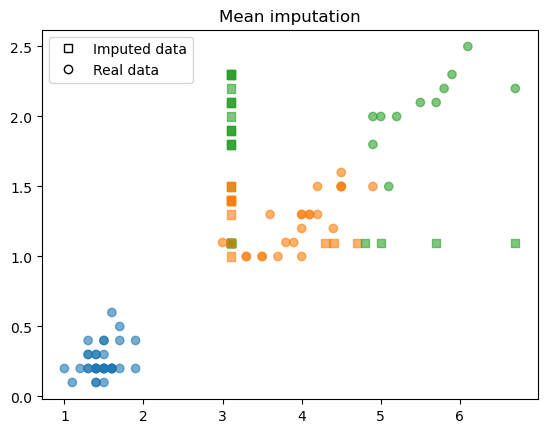

In [35]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.tab10(y_train[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.tab10(y_train[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_mean_imp, "Mean imputation")

In [36]:
mean_pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression(solver='lbfgs',multi_class='multinomial'))
scores = cross_val_score(mean_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.8128787878787879

# Model-driven imputation and KNN

In [37]:
# Very inefficient didactic implementation

distances = np.zeros((X_train.shape[0], X_train.shape[0]))
for i, x1 in enumerate(X_train):
    for j, x2 in enumerate(X_train):
        dist = (x1 - x2) ** 2
        nan_mask = np.isnan(dist)
        distances[i, j] = dist[~nan_mask].mean() * X_train.shape[1]
        
neighbors = np.argsort(distances, axis=1)[:, 1:]
n_neighbors = 3

X_train_knn = X_train.copy()
for feature in range(X_train.shape[1]):
    has_missing_value = np.isnan(X_train[:, feature])
    for row in np.where(has_missing_value)[0]:
        neighbor_features = X_train[neighbors[row], feature]
        non_nan_neighbors = neighbor_features[~np.isnan(neighbor_features)]
        X_train_knn[row, feature] = non_nan_neighbors[:n_neighbors].mean()

In [38]:
X_train[:4]

array([[6. , 3.4, 4.5, 1.6],
       [4.7, 3.2, 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.6, 3. , 4.1, 1.3]])

In [39]:
for i, x1 in enumerate(X_train):
    print(i,x1)

0 [6.  3.4 4.5 1.6]
1 [4.7 3.2 1.3 0.2]
2 [4.4 2.9 1.4 0.2]
3 [5.6 3.  4.1 1.3]
4 [6.5 3.  5.8 2.2]
5 [6.4 2.8 nan 2.2]
6 [5.7 2.9 4.2 1.3]
7 [4.7 3.2 1.6 0.2]
8 [6.9 3.1 4.9 1.5]
9 [4.9 3.  1.4 0.2]
10 [5.4 3.4 1.5 0.4]
11 [4.9 2.4 3.3 1. ]
12 [5.  3.  1.6 0.2]
13 [5.8 2.7 nan 1.9]
14 [4.8 3.4 1.6 0.2]
15 [5.  2.3 3.3 1. ]
16 [6.1 2.9 nan 1.4]
17 [5.5 2.3 4.  1.3]
18 [6.4 2.9 4.3 nan]
19 [6.8 3.2 5.9 2.3]
20 [7.4 2.8 nan 1.9]
21 [6.1 2.8 4.7 nan]
22 [4.8 3.  1.4 0.1]
23 [6.3 3.4 nan nan]
24 [6.9 3.1 nan 2.3]
25 [6.7 3.3 5.7 nan]
26 [7.7 3.  nan 2.3]
27 [5.5 2.6 4.4 1.2]
28 [6.8 2.8 nan 1.4]
29 [5.7 2.5 5.  2. ]
30 [6.4 2.7 nan 1.9]
31 [5.6 2.8 4.9 2. ]
32 [6.4 3.2 4.5 1.5]
33 [5.2 3.4 1.4 0.2]
34 [4.3 3.  1.1 0.1]
35 [6.  2.2 nan 1.5]
36 [6.3 2.9 nan nan]
37 [6.3 2.5 nan nan]
38 [6.5 2.8 nan 1.5]
39 [6.4 3.2 nan 2.3]
40 [6.7 2.5 nan 1.8]
41 [5.1 3.5 1.4 0.2]
42 [5.  3.3 1.4 0.2]
43 [5.6 2.5 3.9 1.1]
44 [5.1 3.5 1.4 0.3]
45 [5.  2.  3.5 1. ]
46 [6.5 3.2 nan 2. ]
47 [5.1 3.8 1.6 0.2]
48

In [40]:
print(X_train.shape[0])

112


In [41]:
print(distances[:1])

[[ 0.    13.93  14.38   0.57   2.46   1.173  0.52  12.1    1.07  12.94
  10.8    4.01  11.53   0.827 11.81   4.01   0.4    1.8    0.6    3.13
   3.213  0.547 13.46   0.18   1.853  2.587  4.72   1.06   1.387  1.31
   0.987  0.84   0.21  12.21  16.86   1.933  0.68   1.8    0.827  0.92
   1.787 12.39  12.58   1.58  12.12   4.32   0.6   11.34   9.17   1.533
   0.72   1.7    2.09  14.92  11.66   9.87  12.94   2.64  10.16   0.44
   4.12   1.99   0.653 12.26   1.187  1.747 10.42   0.7    1.3    0.71
  10.787  9.89   1.44   4.85   0.34   1.31   0.82  11.54   2.25  15.39
  12.29   1.16   1.09   2.027 11.9   13.25  12.9   11.41  10.16   1.49
   1.52   3.96   1.533 13.11   1.06  11.61   0.8   11.77   1.56   0.827
   0.1    2.05  16.21   0.78   2.19  11.34   0.27   0.53  12.38   2.05
   1.027  8.25 ]]


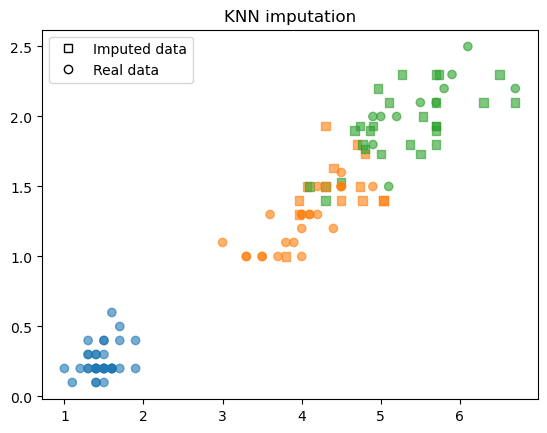

In [42]:
plot_imputation(X_train_knn, "KNN imputation")

In [43]:
# this is cheating because I'm not using a pipeline
# we would need to write a transformer that does the imputation
scores = cross_val_score(logreg, X_train_knn, y_train, cv=10)
np.mean(scores)

0.918939393939394

In [44]:
asdf = np.arange(5)

In [45]:
from sklearn.ensemble import RandomForestRegressor


# this is just because I'm lazy and don't want to special-case the first iteration
X_imputed = SimpleImputer().fit_transform(X_train)

rf = RandomForestRegressor(n_estimators=100)

for i in range(10):
    last = X_imputed.copy()
    for feature in range(X_train.shape[1]):
        inds_not_f = np.arange(X_train.shape[1])
        inds_not_f = inds_not_f[inds_not_f != feature]
        f_missing = np.isnan(X_train[:, feature])
        if not np.any(f_missing):
            continue
        rf.fit(X_imputed[~f_missing][:, inds_not_f], X_train[~f_missing, feature])

        X_imputed[f_missing, feature] = rf.predict(X_imputed[f_missing][:, inds_not_f])

    # this would make more sense if we scaled the data beforehand
    if (np.linalg.norm(last - X_imputed)) < .5:
        print(i)
        break


2


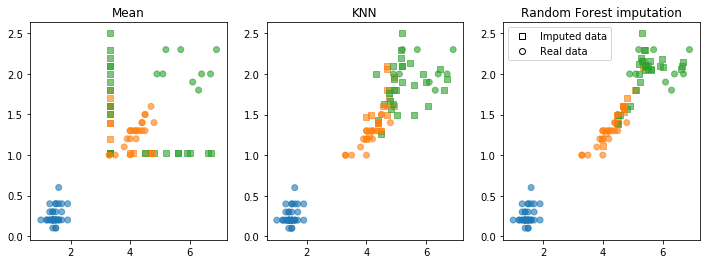

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_imputation(X_mean_imp, "Mean", ax=axes[0])
plot_imputation(X_train_knn, "KNN", ax=axes[1])
plot_imputation(X_imputed, "Random Forest imputation", ax=axes[2])

In [33]:
scores = cross_val_score(logreg, X_imputed, y_train, cv=10)
np.mean(scores)

0.9305555555555556